**Aluno: Leonardo Ribeiro Schaedler**

# Atividade Aprendizagem de Máquina - Spark MLLib

Considerando o dataset detalhado a seguir, aplique as técnicas solicitadas

### Dataset dados de sensores veicular

- Dados relativos a sensores de internet das coisas (IoT) para detecção de estados dos medidores


| #  	| Nome do campo           	| Descrição                                                                     	|
|----	|-------------------------	|-------------------------------------------------------------------------------	|
| 0  	| Hora               	| Hora média das medições                                                          	|
| 1  	| Minuto         	| Minuto médio das medições                                               	|
| 2  	| Temp_minima         	| Temperatura mínima das medições                                               	|
| 3  	| Temp_maxima         	| Temperatura máxima das medições                                               	|
| 4  	| Latitude_media  	| Latitude média das medições                             	|
| 5  	| Longitude_media  	| Longitude média das medições                             	|
| 6  	| Classe  	| Estado do medidor (Frio, Moderado, Quente, Alerta)                             	|


**Informações a serem extraídas:**

1. Calcule a acurácia de classificação na base de testes para os seguintes classificadores:
    1. Árvore de Decisão (from pyspark.ml.classification import DecisionTreeClassifier)
    2. Random Forest com 5 arvores (from pyspark.ml.classification import RandomForestClassifier, e numTrees=5 no construtor do RandomForestClassifier)
    3. Random Forest com 100 arvores (numTrees=100 no construtor do RandomForestClassifier)
2. Determine qual a quantidade de eventos Alerta (label = 3.0) classificados erroneamente como outra classe (falso-negativo) para os classificadores
    1. Árvore de Decisão (from pyspark.ml.classification import DecisionTreeClassifier)
    2. Random Forest com 5 arvores (from pyspark.ml.classification import RandomForestClassifier, e numTrees=5 no construtor do RandomForestClassifier)
    3. Random Forest com 100 arvores (numTrees=100 no construtor do RandomForestClassifier)
3. Determine qual a quantidade de eventos não Alerta (label = 0.0, ou label = 1.0, ou label = 2.0) classificados erroneamente como classe Alerta (falso-positivo) para os classificadores
    1. Árvore de Decisão (from pyspark.ml.classification import DecisionTreeClassifier)
    2. Random Forest com 5 arvores (from pyspark.ml.classification import RandomForestClassifier, e numTrees=5 no construtor do RandomForestClassifier)
    3. Random Forest com 100 arvores (numTrees=100 no construtor do RandomForestClassifier)
4. Faça votação entre os classificadores da etapa 1.A, 1.B e 1.C para atribuir a classe do evento de acordo com a maioria das classes entre os classificadores
    - Dicas: Para isto, voce irá precisar fazer o join das predições de cada classificador de acordo com os IDs dos eventos. Posteriormente voce pode manipular o dataframe, após o join, para determinar qual classe de cada evento possuiu maior votação =). Exemplo de código:
```python

    import pyspark.sql.functions as func
    
    predicaoDT.select(func.col('prediction').alias('prediction_dt'),
                        func.col('label'),
                        func.col('id'))\
    .join(predicaoRF.select(func.col('prediction').alias('prediction_rf'),
                        func.col('id')), ['id'])
```
5. Considerando que voce possui apenas duas classes: Não Alerta e Alerta. Calcule a acurácia de classificação na base de testes para os seguintes classificadores:
    1. Árvore de Decisão (from pyspark.ml.classification import DecisionTreeClassifier)
    2. Random Forest com 20 arvores (from pyspark.ml.classification import RandomForestClassifier, e numTrees=20 no construtor do RandomForestClassifier)
    3. Random Forest com 100 arvores (numTrees=100 no construtor do RandomForestClassifier)
        - Dicas: Para isto, você irá precisar manipular o dataframe para alterar os valores da coluna label, por exemplo através de uma UDF
6. Determine qual a quantidade de eventos Alerta (label = 3.0) classificados erroneamente como outra classe (falso-negativo) para os classificadores do item 5
7. Faça busca de parametros dos classificadores desenvolvidos no item 5. Plote um gráfico relacionando a acurácia e os parametros otimizados
    1. Árvore de Decisão varie o parametro maxDepth de 1 a 20
    2. Random Forest varie o numTrees de 1 a 20

**Dicas:**
- *Crie uma célula (Insert -> Insert Cell Below) para cada informação solicitada*
- *A análise deve ser feita sobre os dados do HDFS*
- *Inicialize o seu cluster executando o script em: Desktop/ambientes/spark/inicializar.sh*
- *Acesse o seu cluster executando o script em: Desktop/ambientes/spark/abrir_navegador.sh*

In [3]:
#instala pyspark no google colab
!pip install pyspark==3.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845494 sha256=03a7eebfe67fe91880e8519e70509c4fa3c423d58b51816e1cd8ba225079f5c8
  Stored in directory: /root/.cache/pip/wheels/0f/f0/3d/517368b8ce80486e84f89f214e0a022554e4ee64969f46279b
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
# abre sessão no spark sql
from pyspark.sql import SparkSession

sc = SparkSession \
    .builder \
    .master('local[*]') \
    .getOrCreate()

In [5]:
#Efetua download do arquivo
!gdown 1-lSo7A-SIuntho9tAqVO25enmLlxFe7S
!gdown 1-iG4e4-SzJONLi3Nw98nm9UdFzoqCHDI

Downloading...
From: https://drive.google.com/uc?id=1-lSo7A-SIuntho9tAqVO25enmLlxFe7S
To: /content/treinamento.csv
100% 26.1M/26.1M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-iG4e4-SzJONLi3Nw98nm9UdFzoqCHDI
To: /content/teste.csv
100% 37.4M/37.4M [00:00<00:00, 75.6MB/s]


In [58]:
dfTreino = sc.read\
    .option('delimiter',',')\
    .option('header','true')\
    .option('inferschema','true')\
    .csv('file:////content/treinamento.csv')

dfTeste = sc.read\
    .option('delimiter',',')\
    .option('header','true')\
    .option('inferschema','true')\
    .csv('file:////content/teste.csv')

In [7]:
dfTreino.printSchema()

root
 |-- hora: double (nullable = true)
 |-- minuto: double (nullable = true)
 |-- temp_minima: double (nullable = true)
 |-- temp_maxima: double (nullable = true)
 |-- latitude_media: double (nullable = true)
 |-- longitude_media: double (nullable = true)
 |-- Classe: string (nullable = true)



In [25]:
#informação 1.A

In [60]:
dfTreino.groupBy("Classe").count().show()

+--------+------+
|  Classe| count|
+--------+------+
|Moderado|122589|
|  Alerta|115740|
|  Quente| 59031|
|    Frio|106767|
+--------+------+



In [61]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

labelIndexer = StringIndexer(inputCol="Classe", outputCol="indexedLabel").fit(dfTreino)

assembler = VectorAssembler(
    inputCols=["hora", "minuto", "temp_minima", "temp_maxima", "latitude_media", "longitude_media"],
    outputCol="features")

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="features")

pipeline_dt = Pipeline(stages=[labelIndexer, assembler, dt])

model_dt = pipeline_dt.fit(dfTreino)

predictions_dt = model_dt.transform(dfTeste)

predictions_dt.select("prediction", "Classe", "features").show(120)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_dt = evaluator.evaluate(predictions_dt)
print("Decision Tree Accuracy = %g" % accuracy_dt)

+----------+--------+--------------------+
|prediction|  Classe|            features|
+----------+--------+--------------------+
|       0.0|Moderado|[11.787212,29.005...|
|       0.0|Moderado|[11.482636,29.845...|
|       0.0|Moderado|[11.312064,29.751...|
|       0.0|Moderado|[11.530982,29.505...|
|       0.0|Moderado|[11.4008,29.42228...|
|       0.0|Moderado|[11.50784,29.1851...|
|       0.0|Moderado|[11.318713,29.743...|
|       0.0|Moderado|[11.324524,30.054...|
|       0.0|Moderado|[11.563602,29.702...|
|       0.0|Moderado|[11.512673,30.439...|
|       0.0|Moderado|[11.662633,29.325...|
|       0.0|Moderado|[11.465534,28.917...|
|       0.0|Moderado|[11.511455,29.308...|
|       0.0|Moderado|[11.458397,29.353...|
|       0.0|Moderado|[11.200801,29.746...|
|       0.0|Moderado|[11.46211,29.5755...|
|       0.0|Moderado|[11.418279,29.644...|
|       0.0|Moderado|[11.496075,29.468...|
|       0.0|Moderado|[11.367968,29.559...|
|       0.0|Moderado|[11.400568,29.441...|
|       0.0

In [ ]:
#informação 1.B

In [62]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dfTreino = sc.read\
    .option('delimiter',',')\
    .option('header','true')\
    .option('inferschema','true')\
    .csv('file:////content/treinamento.csv')

labelIndexer = StringIndexer(inputCol="Classe", outputCol="indexedLabel").fit(dfTreino)

assembler = VectorAssembler(
    inputCols=["hora", "minuto", "temp_minima", "temp_maxima", "latitude_media", "longitude_media"],
    outputCol="features")

rf_5 = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=5)
pipeline_rf_5 = Pipeline(stages=[labelIndexer, assembler, rf_5])

model_rf_5 = pipeline_rf_5.fit(dfTreino)

predictions_rf_5 = model_rf_5.transform(dfTeste)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_rf_5 = evaluator.evaluate(predictions_rf_5)
print("Random Forest with 5 Trees Accuracy = %g" % accuracy_rf_5)

Random Forest with 5 Trees Accuracy = 0.93753


In [ ]:
#informação 1.C

In [63]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dfTreino = sc.read\
    .option('delimiter',',')\
    .option('header','true')\
    .option('inferschema','true')\
    .csv('file:////content/treinamento.csv')

labelIndexer = StringIndexer(inputCol="Classe", outputCol="indexedLabel").fit(dfTreino)

assembler = VectorAssembler(
    inputCols=["hora", "minuto", "temp_minima", "temp_maxima", "latitude_media", "longitude_media"],
    outputCol="features")

rf_100 = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=100)
pipeline_rf_100 = Pipeline(stages=[labelIndexer, assembler, rf_100])

model_rf_100 = pipeline_rf_100.fit(dfTreino)

predictions_rf_100 = model_rf_100.transform(dfTeste)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_rf_100 = evaluator.evaluate(predictions_rf_100)
print("Random Forest with 100 Trees Accuracy = %g" % accuracy_rf_100)

Random Forest with 100 Trees Accuracy = 0.94549


In [ ]:
#informação 2.A

In [64]:
fn_dt = predictions_dt.filter((predictions_dt['indexedLabel'] == 3.0) & (predictions_dt['prediction'] != 3.0)).count()
print(f"Decision Tree False Negatives for 'Alerta': {fn_dt}")

Decision Tree False Negatives for 'Alerta': 9774


In [ ]:
#informação 2.B

In [65]:
fn_rf_5 = predictions_rf_5.filter((predictions_rf_5['indexedLabel'] == 3.0) & (predictions_rf_5['prediction'] != 3.0)).count()
print(f"Random Forest with 5 Trees False Negatives for 'Alerta': {fn_rf_5}")

Random Forest with 5 Trees False Negatives for 'Alerta': 16290


In [ ]:
#informação 2.C

In [66]:
fn_rf_100 = predictions_rf_100.filter((predictions_rf_100['indexedLabel'] == 3.0) & (predictions_rf_100['prediction'] != 3.0)).count()
print(f"Random Forest with 100 Trees False Negatives for 'Alerta': {fn_rf_100}")

Random Forest with 100 Trees False Negatives for 'Alerta': 12771


In [ ]:
#informação 3.A

In [67]:
fp_dt = predictions_dt.filter((predictions_dt['indexedLabel'] != 3.0) & (predictions_dt['prediction'] == 3.0)).count()
print(f"Decision Tree False Positives for 'Alerta': {fp_dt}")

Decision Tree False Positives for 'Alerta': 14202


In [ ]:
#informação 3.B

In [68]:
fp_rf_5 = predictions_rf_5.filter((predictions_rf_5['indexedLabel'] != 3.0) & (predictions_rf_5['prediction'] == 3.0)).count()
print(f"Random Forest with 5 Trees False Positives for 'Alerta': {fp_rf_5}")

Random Forest with 5 Trees False Positives for 'Alerta': 7902


In [ ]:
#informação 3.C

In [69]:
fp_rf_100 = predictions_rf_100.filter((predictions_rf_100['indexedLabel'] != 3.0) & (predictions_rf_100['prediction'] == 3.0)).count()
print(f"Random Forest with 100 Trees False Positives for 'Alerta': {fp_rf_100}")

Random Forest with 100 Trees False Positives for 'Alerta': 9243


In [ ]:
#informação 4

In [72]:
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import functions as func

predictions_dt = predictions_dt.withColumn("id", monotonically_increasing_id())
predictions_rf_5 = predictions_rf_5.withColumn("id", monotonically_increasing_id())
predictions_rf_100 = predictions_rf_100.withColumn("id", monotonically_increasing_id())

pred_dt = predictions_dt.select(func.col('prediction').alias('prediction_dt'), func.col('id'))
pred_rf_5 = predictions_rf_5.select(func.col('prediction').alias('prediction_rf_5'), func.col('id'))
pred_rf_100 = predictions_rf_100.select(func.col('prediction').alias('prediction_rf_100'), func.col('id'))

joined_predictions = pred_dt.join(pred_rf_5, 'id').join(pred_rf_100, 'id')

majority_vote = joined_predictions.withColumn('majority_vote', func.round((func.col('prediction_dt') + func.col('prediction_rf_5') + func.col('prediction_rf_100')) / 3))

majority_vote.show(120)

+---+-------------+---------------+-----------------+-------------+
| id|prediction_dt|prediction_rf_5|prediction_rf_100|majority_vote|
+---+-------------+---------------+-----------------+-------------+
|  0|          0.0|            0.0|              0.0|          0.0|
|  1|          0.0|            0.0|              0.0|          0.0|
|  5|          0.0|            0.0|              0.0|          0.0|
|  6|          0.0|            0.0|              0.0|          0.0|
|  7|          0.0|            0.0|              0.0|          0.0|
|  9|          0.0|            0.0|              0.0|          0.0|
| 10|          0.0|            0.0|              0.0|          0.0|
| 17|          0.0|            0.0|              0.0|          0.0|
| 19|          0.0|            0.0|              0.0|          0.0|
| 22|          0.0|            0.0|              0.0|          0.0|
| 25|          0.0|            0.0|              0.0|          0.0|
| 26|          0.0|            0.0|             

In [ ]:
#informação 5.A

In [78]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

def convert_label(label):
    return 1.0 if label == 3.0 else 0.0

convert_label_udf = udf(convert_label, DoubleType())

dfTreino = dfTreino.withColumn("binaryLabel", convert_label_udf("Classe"))
dfTeste = dfTeste.withColumn("binaryLabel", convert_label_udf("Classe"))

In [79]:
dt_binary = DecisionTreeClassifier(labelCol="binaryLabel", featuresCol="features")
pipeline_dt_binary = Pipeline(stages=[assembler, dt_binary])
model_dt_binary = pipeline_dt_binary.fit(dfTreino)

predictions_dt_binary = model_dt_binary.transform(dfTeste)

accuracy_dt_binary = evaluator.evaluate(predictions_dt_binary, {evaluator.labelCol: "binaryLabel"})
print("Decision Tree Binary Classification Accuracy = %g" % accuracy_dt_binary)

Decision Tree Binary Classification Accuracy = 1


In [ ]:
#informação 5.B

In [87]:
rf_20_binary = RandomForestClassifier(labelCol="binaryLabel", featuresCol="features", numTrees=20)
pipeline_rf_20_binary = Pipeline(stages=[assembler, rf_20_binary])
model_rf_20_binary = pipeline_rf_20_binary.fit(dfTreino)

predictions_rf_20_binary = model_rf_20_binary.transform(dfTeste)

accuracy_rf_20_binary = evaluator.evaluate(predictions_rf_20_binary, {evaluator.labelCol: "binaryLabel"})
print("Random Forest with 20 Trees Binary Classification Accuracy = %g" % accuracy_rf_20_binary)

Random Forest with 20 Trees Binary Classification Accuracy = 1


In [ ]:
#informação 5.C

In [86]:
rf_100_binary = RandomForestClassifier(labelCol="binaryLabel", featuresCol="features", numTrees=100)
pipeline_rf_100_binary = Pipeline(stages=[assembler, rf_100_binary])
model_rf_100_binary = pipeline_rf_100_binary.fit(dfTreino)

predictions_rf_100_binary = model_rf_100_binary.transform(dfTeste)

accuracy_rf_100_binary = evaluator.evaluate(predictions_rf_100_binary, {evaluator.labelCol: "binaryLabel"})
print("Random Forest with 100 Trees Binary Classification Accuracy = %g" % accuracy_rf_100_binary)

Random Forest with 100 Trees Binary Classification Accuracy = 1


In [ ]:
#informação 6

In [82]:
fn_dt_binary = predictions_dt_binary.filter((predictions_dt_binary['binaryLabel'] == 1.0) & (predictions_dt_binary['prediction'] == 0.0)).count()
print(f"Decision Tree False Negatives for 'Alerta': {fn_dt_binary}")

Decision Tree False Negatives for 'Alerta': 0


In [83]:
fn_rf_20_binary = predictions_rf_20_binary.filter((predictions_rf_20_binary['binaryLabel'] == 1.0) & (predictions_rf_20_binary['prediction'] == 0.0)).count()
print(f"Random Forest with 20 Trees False Negatives for 'Alerta': {fn_rf_20_binary}")

Random Forest with 20 Trees False Negatives for 'Alerta': 0


In [84]:
fn_rf_100_binary = predictions_rf_100_binary.filter((predictions_rf_100_binary['binaryLabel'] == 1.0) & (predictions_rf_100_binary['prediction'] == 0.0)).count()
print(f"Random Forest with 100 Trees False Negatives for 'Alerta': {fn_rf_100_binary}")

Random Forest with 100 Trees False Negatives for 'Alerta': 0


In [ ]:
#informação 7.A

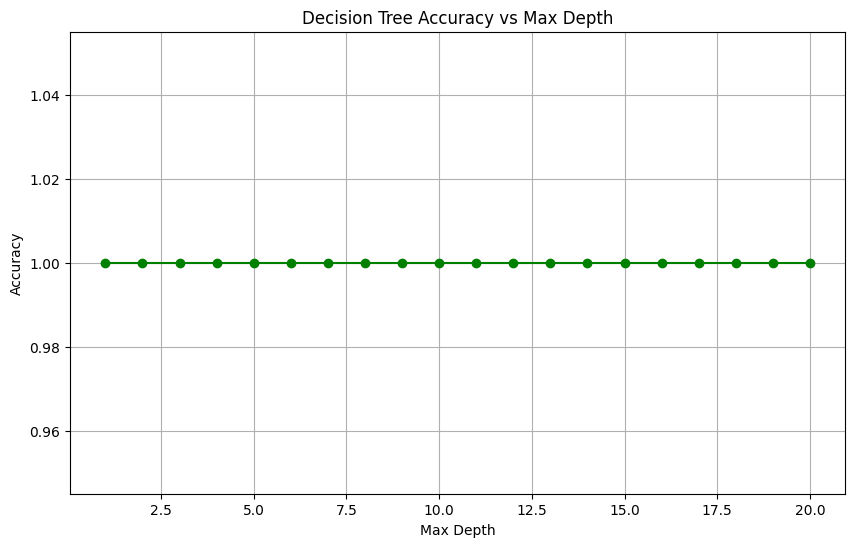

In [88]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

depths = list(range(1, 21))
accuracies_dt = []

for depth in depths:
    dt = DecisionTreeClassifier(labelCol="binaryLabel", featuresCol="features", maxDepth=depth)
    pipeline = Pipeline(stages=[assembler, dt])
    model = pipeline.fit(dfTreino)
    predictions = model.transform(dfTeste)

    evaluator = MulticlassClassificationEvaluator(labelCol="binaryLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    accuracies_dt.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies_dt, marker='o', color='green')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
#informação 7.B

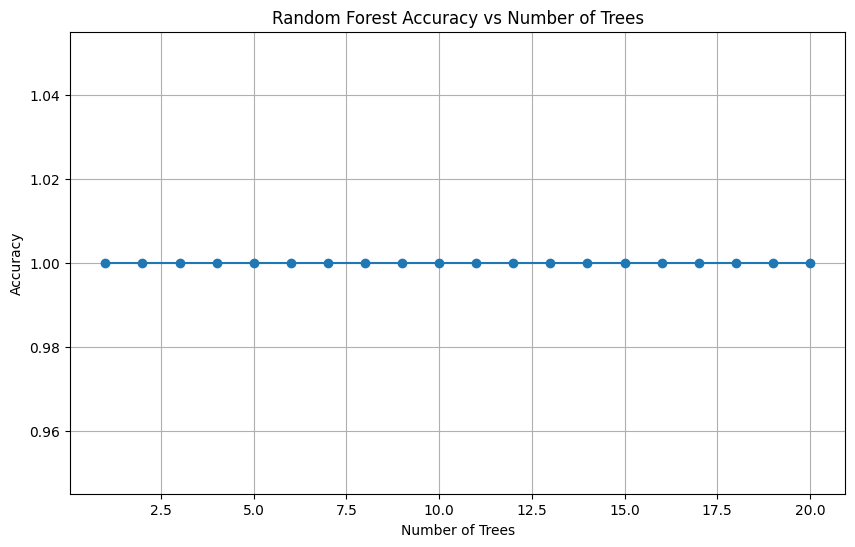

In [89]:
num_trees = list(range(1, 21))
accuracies_rf = []

for n in num_trees:
    rf = RandomForestClassifier(labelCol="binaryLabel", featuresCol="features", numTrees=n)
    pipeline = Pipeline(stages=[assembler, rf])
    model = pipeline.fit(dfTreino)
    predictions = model.transform(dfTeste)

    accuracy = evaluator.evaluate(predictions)
    accuracies_rf.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracies_rf, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()